# Project: Marketing Campaigns

**Problem Scenario:**
Marketing mix is a popular concept used in implementing marketing strategies. It includes multiple areas of focus as part of a comprehensive marketing plan, which revolves around the four Ps of marketing: product, price, place, and promotion.

**Problem Objective:**
Gain a better understanding of the various factors that contribute to customer acquisition by performing exploratory data analysis and hypothesis testing.

**Data Description:**
The tabular data provided to the user includes variables related to the four Ps of marketing:

* **People:** birth-year, education, income, etc.
* **Product:** amount spent on wine, fruits, gold, etc.
* **Place:** sales channels, like websites, stores, etc.
* **Promotion:** promotions and results of different campaigns.

| Variable | Description |
|---|---|
| ID | Customer's unique identifier |
| Year of birth | Customer's year of birth |
| Education | Customer's highest level of education |
| Marital Status | Customer's marital status |
| Income | Customer's annual income |
| Kidhome | Number of children at home |
| Teenhome | Number of teenagers at home |
| Dt_Customer | Date the customer became a customer |
| Recency | Number of days since the customer's last purchase |
| MntWines | Amount spent on wine in the past year |
| MntFruits | Amount spent on fruits in the past year |
| MntMeatProducts | Amount spent on meat products in the last 2 years |
| MntFishProducts | Amount spent on fish products in the last 2 years |
| MntSweetProducts | Amount spent on sweet products in the last 2 years |
| MntGoldProds | Amount spent on gold products in the last 2 years |
| NumDealsPurchases | Number of purchases made through deals in the last 2 years |
| NumWebPurchases | Number of purchases made through the web in the last 2 years |
| NumCatalog Purchases | Number of purchases made through the catalog in the last 2 years |
| NumStorePurchases | Number of purchases made in stores in the last 2 years |
| NumWebVisitsMonth | Number of visits to the website in the past month |
| AcceptedCmp3 | 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise |
| AcceptedCmp4 | 1 if the customer accepted the offer in the 4th campaign, 0 otherwise |
| AcceptedCmp5 | 1 if the customer accepted the offer in the 5th campaign, 0 otherwise |
| AcceptedCmp1 | 1 if the customer accepted the offer in the first campaign, 0 otherwise |
| AcceptedCmp2 | 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise |
| Response | 1 if the customer accepted the offer in the last campaign, 0 otherwise |
| Complain | 1 if customer complained in the last 2 years |
| Country | Customer's country of residence |


## Tasks

### Stage 1: Data Preparation

* Import the data and investigate variables to check if they are imported correctly.
* Perform missing value imputation for income values.
* Clean the data, if necessary.
* Create variables to populate the total number of children, age, and total spending.

### Stage 2: Data Exploration

* Create box plots and histograms to understand the distributions and outliers.
* Perform outlier treatment.
* ~~Use ordinal encoding and one hot encoding according to different types of categorical variables.~~
* Create a heatmap to showcase the correlation between different pairs of variables.

### Stage 3: Hypothesis Testing

Test the following hypotheses:

* Older people are not as tech-savvy and probably prefer shopping in-store.
* Customers with kids probably have less time to visit a store and would prefer to shop online.
* Other distribution channels may cannibalize sales at the store.
* Does the US fare significantly better than the rest of the world in terms of total purchases?

### Stage 4: Data Visualization

Use appropriate visualization to help analyze the following:

* Which products are performing the best, and which are performing the least in terms of revenue?
* Is there any pattern between the age of customers and the last campaign acceptance rate?
* Which Country has the greatest number of customers who accepted the last campaign?
* Do you see any pattern in the no. of children at home and total spend?
* Education background of the customers who complained in the last 2 years.


---
# Imports

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy    # ZScore
import pandas as pd
import statistics

%config InlineBackend.figure_formats =['svg']

# 1- Data Preparation

## Import the data and investigate variables to check if they are imported correctly.

In [43]:
df = pd.read_csv('marketing_data.csv')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

## Perform missing value imputation for income values.

In [45]:
# Convert Income From string to float
df[' Income '] = df[' Income '].str.replace('[$,]','',regex=True).astype(float)
df[' Income ']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name:  Income , Length: 2240, dtype: float64

In [46]:
df.isna().sum() # Notice that only "Income" has missing values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [47]:
# Rows that have Null values
df[df[' Income '].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,1/12/14,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,...,4,3,0,0,0,0,0,0,0,AUS


In [48]:
# Drop missing values
df.dropna(inplace=True)

In [49]:
# Rows that have Null values
df[' Income '].isna().any()

False

### Clean the data, if necessary.

In [50]:
# Renaming data columns, because they have spaces.
df.columns = df.rename(str.strip, axis='columns').columns

In [51]:
# Delete duplicated if found
df = df.drop_duplicates()

In [52]:
# Edit Marital_Status
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Not Married' if x in ['Divorced', 'Single', 'Alone', 'Absurd'] else 'Married' if x in ['Married', 'Together'] else 'Widow')

In [53]:
# Convert customer date to Datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [54]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Not Married,84835.0,0,0,2014-06-16,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Not Married,57091.0,0,0,2014-06-15,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Married,32474.0,1,1,2014-05-11,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Not Married,21474.0,1,0,2014-04-08,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Not Married,66476.0,0,1,2013-03-07,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Not Married,46310.0,1,0,2012-12-03,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,10,3,0,0,0,0,0,0,0,IND


### Create variables to populate the total number of children, age, and total spending.

In [55]:
# Create Age column
df['n_children'] = df['Teenhome'] + df['Kidhome']
df['total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntGoldProds'] + df['MntFishProducts'] + df['MntSweetProducts']

# FIXME: Calculate the age from the last customer entered
# df['age'] = 2023 - df['Year_Birth']
df['age'] = df['Dt_Customer'].dt.year - df['Year_Birth']

# 2- Data Exploration

### Create box plots and histograms to understand the distributions and outliers.

In [56]:
# This is because we want to plot only numerics
numeric_table = df.select_dtypes(include=['float64','int64'])

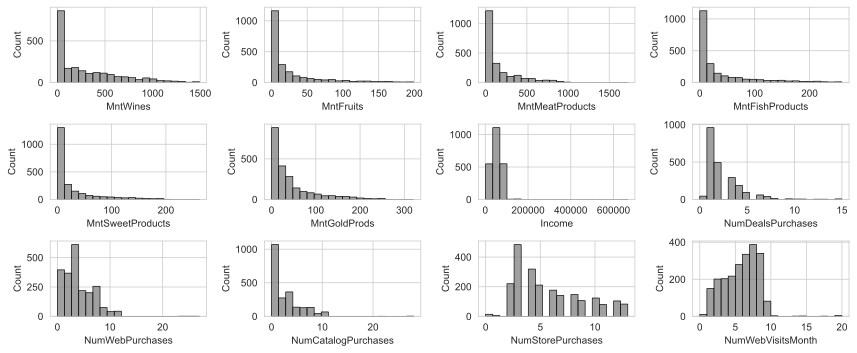

In [57]:
selected_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

plt.figure(figsize=(12,5))
for i, col in enumerate(selected_cols):
    plt.subplot(3,4,i+1)
    sns.histplot(x=df[col],bins=20,color='grey',edgecolor='black')
        
plt.tight_layout()
plt.show()

In [58]:
def is_outlier(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    # Conditions
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr

    return (data < lower) | (data > upper)

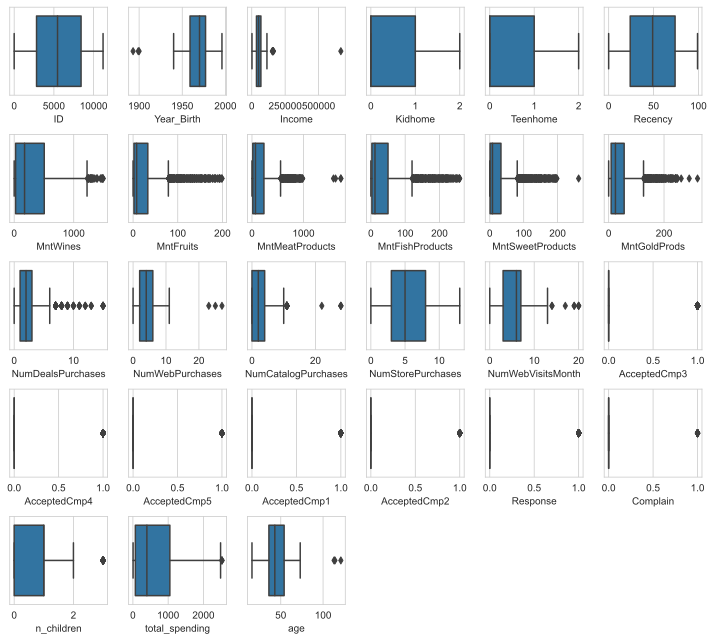

In [59]:
plt.figure(figsize=(10,9))
for i, col in enumerate(numeric_table.columns):
    plt.subplot(5,6,i+1)
    sns.boxplot(x=df[col], orient='y')
plt.tight_layout()
plt.show()

### Perform outlier treatment.

In [60]:
def outlier_treatment(row,colname):
    global df # To edit on the original df
    
    ax[row,0].set_title(f'{colname} column before deleting outliers')
    sns.boxplot(data=df,x=colname,ax=ax[row,0])
    
    # We noticed that the only noticeable outliers are in the Income column
    df = df[~is_outlier(df[colname])]
    
    ax[row,1].set_title(f'{colname} column after deleting outliers')
    sns.boxplot(data=df,x=colname,ax=ax[row,1])

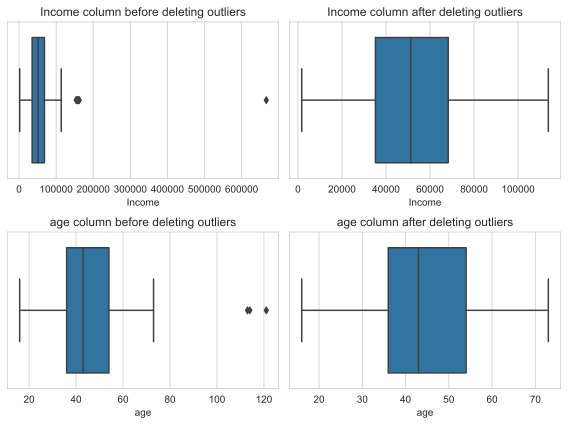

In [61]:
fig, ax= plt.subplots(nrows=2,ncols=2,figsize=(8,6))
outlier_treatment(0,'Income') # Plot before-after deleting outliers
outlier_treatment(1,'age') # Plot before-after deleting outliers
plt.tight_layout()
plt.show()

### Create a heatmap to showcase the correlation between different pairs of variables.

In [62]:
corr1 = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
corr2 = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
corr3 = ['Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

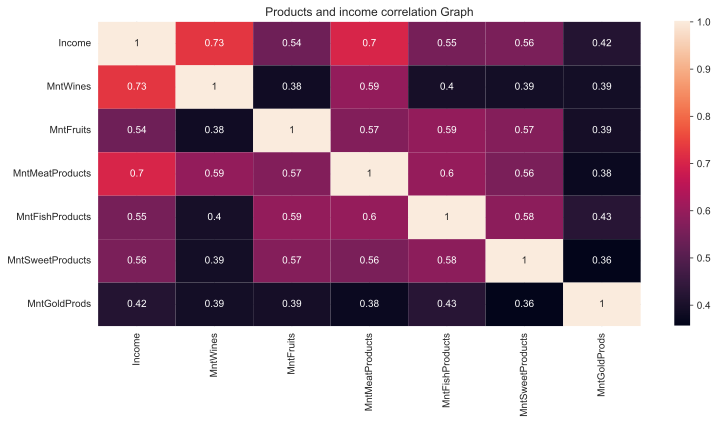

In [63]:
plt.figure(figsize=(11,6))
plt.title('Products and income correlation Graph')
sns.heatmap(df[corr1].corr(), annot=True,annot_kws={"size": 10})
plt.tight_layout()

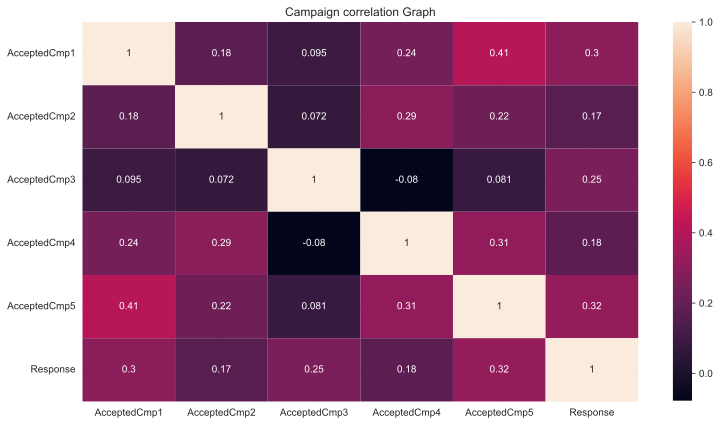

In [64]:
plt.figure(figsize=(11,6))
plt.title('Campaign correlation Graph')
sns.heatmap(df[corr2].corr(), annot=True,annot_kws={"size": 10})
plt.tight_layout()

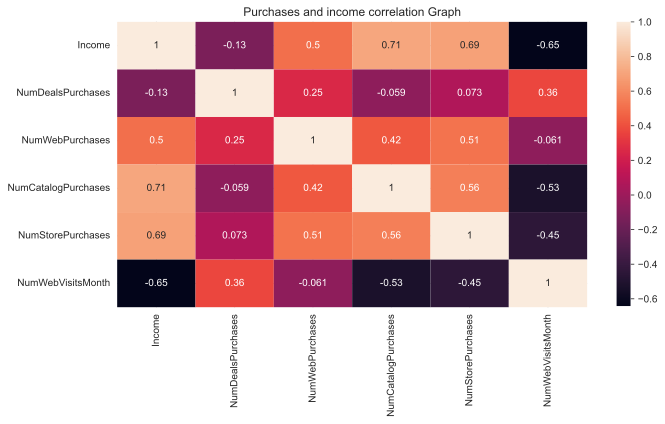

In [65]:
plt.figure(figsize=(10,6))
plt.title('Purchases and income correlation Graph')
sns.heatmap(df[corr3].corr(), annot=True,annot_kws={"size": 10})
plt.tight_layout()

# 3- Hypothesis Testings

### Older people are not as tech-savvy and probably prefer shopping in-store.

In [66]:
older_ppl = df[ df['age'] > 50 ] # Choosing only older people
sample1 = older_ppl['NumWebPurchases'] # Web-Purchases
sample2 = older_ppl['NumStorePurchases'] # Store-Purchases

In [67]:
alpha = 0.05
_, p_value = scipy.stats.ttest_ind(sample1,sample2)

print('The probability of rejecting this hypothesis is: ',p_value)
if p_value <= alpha:
    # The Hypothesis is true
    print(f'There is strong evidence suggesting that older people prefer shopping by themselves than shopping online.')
else:
    # Reject Hypothesis
    print(f'There is no strong evidence suggesting that older people prefer shopping by themselves than shopping online.')

The probability of rejecting this hypothesis is:  8.14766328072248e-32
There is strong evidence suggesting that older people prefer shopping by themselves than shopping online.


### Customers with kids probably have less time to visit a store and would prefer to shop online.

In [68]:
ppl_with_kids = df[ df['Kidhome'] > 0 ] # Choosing only people with kids
sample1 = ppl_with_kids['NumStorePurchases'] # Web-Purchases
sample2 = ppl_with_kids['NumWebPurchases'] # Store-Purchases

In [69]:
alpha = 0.05
_, p_value = scipy.stats.ttest_ind(sample1,sample2)

print('The probability of rejecting this hypothesis is: ',p_value)
if p_value <= alpha:
    # The Hypothesis is true
    print(f'There is strong evidence suggesting that parents with kids have less time to shop by themselves')
else:
    # Reject Hypothesis
    print('There is no strong evidence suggesting that parents with kids have less time to shop by themselves')

The probability of rejecting this hypothesis is:  9.098327990734618e-23
There is strong evidence suggesting that parents with kids have less time to shop by themselves


### Other distribution channels may cannibalize sales at the store.

In [70]:
before_channels = df['NumStorePurchases']
after_channels = df['NumDealsPurchases'] +  df['NumCatalogPurchases'] +  df['NumWebPurchases']

In [71]:
alpha = 0.05
t, p_value = scipy.stats.ttest_rel(after_channels,before_channels,alternative='greater')

print('The probability of rejecting this hypothesis is: ',p_value)
if p_value <= alpha:
    # The Hypothesis is true
    print(f'There is strong evidence suggesting that channels effect the sales at the store')
else:
    # Reject Hypothesis
    print('There is no strong evidence suggesting that channels effect the sales at the store')

The probability of rejecting this hypothesis is:  5.986506592344097e-226
There is strong evidence suggesting that channels effect the sales at the store


### Does the US fare significantly better than the rest of the world in terms of total purchases?

In [72]:
# One sample
us = df['Country'] == 'US'
ppl_of_us = df[ us ]['total_spending']
ppl_of_other_cntry = df[~us]['total_spending']

In [73]:
alpha = 0.05
_, p_value = scipy.stats.ttest_ind(ppl_of_us,ppl_of_other_cntry,alternative='greater')

print('The probability of rejecting this hypothesis is: ',p_value)
if p_value <= alpha:
    # The Hypothesis is true
    print(f'There is strong evidence suggesting that US is fare significantly better than the rest of the world.')
else:
    # Reject Hypothesis
    print('There is no strong evidence suggesting that US is fare significantly better than the rest of the world.')

The probability of rejecting this hypothesis is:  0.40165093181256434
There is no strong evidence suggesting that US is fare significantly better than the rest of the world.


# 4- Data Visualization

### Which products are performing the best, and which are performing the least in terms of revenue

In [74]:
products = pd.DataFrame({
    'sweet': [df['MntSweetProducts'].sum()],
    'fish': [df['MntFishProducts'].sum()],
    'gold': [df['MntGoldProds'].sum()],
    'meat': [df['MntMeatProducts'].sum()],
    'fruit': [df['MntFruits'].sum()],
    'wine': [df['MntWines'].sum()],
})

In [75]:
# Colorize bars
color = ['lightgrey'] * 6 # Repeat color n_groups
color[np.argmin(products)] = 'lightcoral'
color[np.argmax(products)] = 'palegreen'

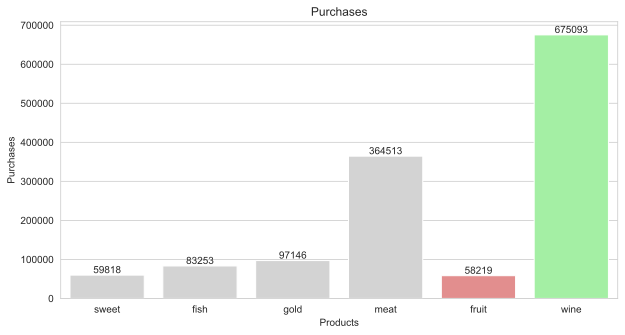

In [76]:
plt.figure(figsize=(10,5))

ax = sns.barplot(data=products,palette=color)
ax.bar_label(ax.containers[0])

plt.xlabel('Products'), plt.ylabel('Purchases')
plt.title('Purchases')
plt.show()

### Is there any pattern between the age of customers and the last campaign acceptance rate?

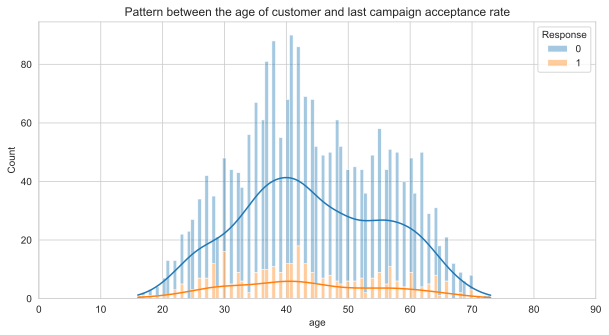

In [77]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='age', hue='Response',multiple='stack',bins=100,kde=True,alpha=0.4)
plt.title('Pattern between the age of customer and last campaign acceptance rate')
plt.xlim([0,90])
plt.show()

### Which Country has the greatest number of customers who accepted the last campaign?

In [78]:
customers = df[ df['Response'] == 1 ].groupby('Country').count().reset_index()[['Country','ID']]

In [79]:
# Colorize bars
color = ['lightgrey'] * 8
color[np.argmin(customers.ID)] = 'lightcoral'
color[np.argmax(customers.ID)] = 'palegreen'

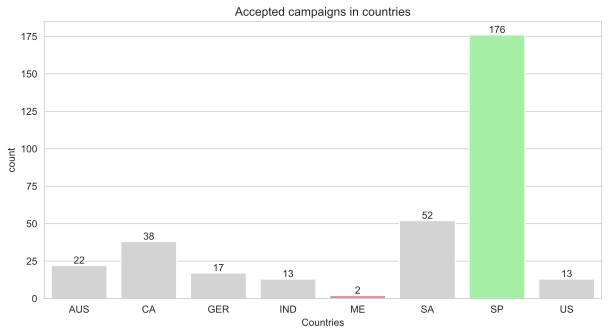

In [80]:
plt.figure(figsize=(10,5))

ax = sns.barplot(x=customers.Country,y=customers.ID ,palette=color)
ax.bar_label(ax.containers[0])

plt.xlabel('Countries'), plt.ylabel('count')
plt.title('Accepted campaigns in countries')
plt.show()

### Do you see any pattern in the no. of children at home and total spend?

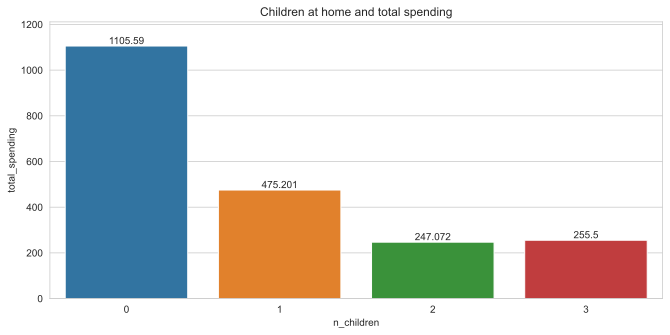

In [81]:
plt.figure(figsize=(11,5))

ax = sns.barplot(data=df,x='n_children',y='total_spending',errwidth=0)
ax.bar_label(ax.containers[0])

plt.title('Children at home and total spending')
plt.show()

### Education background of the customers who complained in the last 2 years.

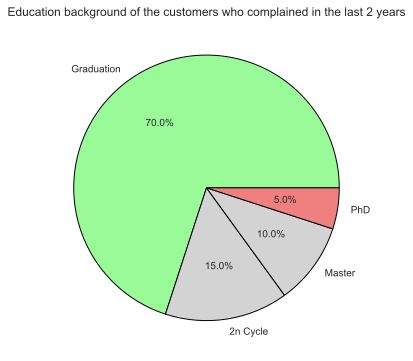

In [82]:
complaints_by_education = df[df['Complain'] == 1]['Education'].value_counts()

colors = ['lightgrey'] * len(complaints_by_education)
colors[complaints_by_education.argmax()] = 'palegreen'
colors[complaints_by_education.argmin()] = 'lightcoral'

plt.figure(figsize=(11, 6))
plt.pie(complaints_by_education.values, labels=complaints_by_education.index, autopct="%1.1f%%", colors = colors, wedgeprops={'edgecolor':'black'})
plt.title('Education background of the customers who complained in the last 2 years')
plt.show()